In [1]:
#🟢 STEP 1: Imports (BASE)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#🟢 STEP 2: Dataset load (TensorFlow se)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#Check:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
#🟢 STEP 3: Normalize + reshape (VERY IMPORTANT)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [5]:
#🟢 STEP 4: BEST CNN MODEL (College-level ⭐)
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),   # overfitting kam karega
    layers.Dense(10, activation="softmax")
])

In [6]:
#🟢 STEP 5: Compile (Correct settings)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
#🟢 STEP 6: Train (ENOUGH epochs)
history = model.fit(
    x_train, y_train,
    epochs=8,
    validation_split=0.1
)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9466 - loss: 0.1715 - val_accuracy: 0.9870 - val_loss: 0.0416
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9842 - loss: 0.0519 - val_accuracy: 0.9880 - val_loss: 0.0380
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9880 - loss: 0.0384 - val_accuracy: 0.9903 - val_loss: 0.0373
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9915 - val_loss: 0.0330
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9930 - loss: 0.0227 - val_accuracy: 0.9922 - val_loss: 0.0326
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9953 - loss: 0.0153 - val_accuracy: 0.9903 - val_loss: 0.0381
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9956 - loss: 0

In [8]:
#🟢 STEP 7: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9911 - loss: 0.0327
Test accuracy: 0.991100013256073


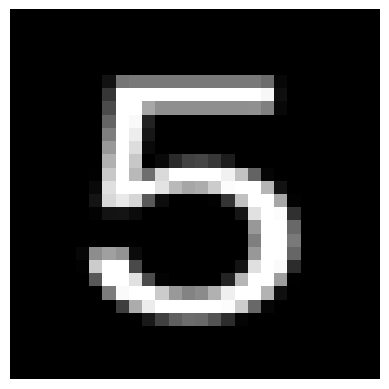

In [9]:
#🔹 Preprocessing code (FINAL VERSION)
from PIL import Image, ImageOps

img = Image.open("five.png").convert("L")

img = ImageOps.invert(img)
img = ImageOps.autocontrast(img)
img = img.resize((28,28))

img = np.array(img).astype("float32") / 255.0
img = img.reshape(1,28,28,1)

plt.imshow(img[0], cmap="gray")
plt.axis("off")
plt.show()

In [10]:
#🟢 STEP 9: Prediction (FINAL)
prediction = model.predict(img)
print("Predicted Digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted Digit: 5
